In [1]:
from __future__ import print_function
import torch
import numpy as np
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#### 1 dimension ###

In [3]:
##normalize y to [-1,1]
def normalize(y):  
    ys=np.array([2*(i-y.min())/(y.max()-y.min())-1 for i in y])
    return ys

In [4]:
##RBF kernel 
def rbf_kernel(x1, x2, lengthscale = 0.3):
    return exp(-1 * ((x1-x2) ** 2) / (2*lengthscale**2))

def gram_matrix(xs):
    return [[rbf_kernel(x1,x2) for x2 in xs] for x1 in xs]

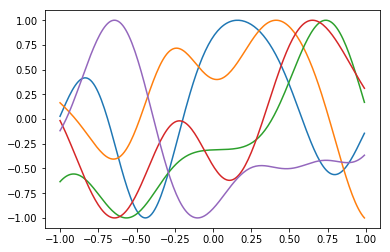

In [5]:
##Generate GP function 
##n functions
n=5

## X=[-1,1] interval=0.01
xs = np.arange(-1, 1, 0.01)
mean = [0 for x in xs]
gram = gram_matrix(xs)

func = []

for i in range(n):
    ys = np.random.multivariate_normal(mean, gram)
    y_nor=normalize(ys)
    func.extend([y_nor])

for i in range(n):    
    plt.plot(xs,func[i])
plt.show()

##save function = traindata_num
#torch.save(func, open('traindata_50000.pt', 'wb'))

In [6]:
##multifidelity

func_mf=[]

for k in range(n):
    
    ##select five points
    x_mf=[]
    y_mf=[]
    for i in range(len(xs)):
        if i % 50 == 0:
            x_mf.extend([xs[i]])
            y_mf.extend([func[k][i]])
    x_mf.extend([xs[-1]])
    y_mf.extend([func[k][-1]])

    ##generate fidelity
    xs_mf= np.linspace(-1, 1, 100)
    ##interpolate 插值
    rbf = scipy.interpolate.Rbf(x_mf, y_mf, function='gaussian',epsilon=0.45)
    func_mf.extend([rbf(xs_mf)])

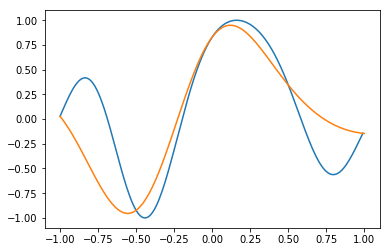

In [7]:
for i in range(1):
    plt.plot(xs,func[i])
    plt.plot(xs_mf,func_mf[i])
plt.show()

In [8]:
##save function = traindata_num_fidelity2
#torch.save(func_mf, open('traindata_50000_fidelity2.pt', 'wb'))

In [9]:
#### 2 dimension ####

In [10]:
def normalize2d(z):
    min=z.min()
    max=z.max()
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            z[i][j]=2*(z[i][j]-min)/(max-min)-1
    return z

In [11]:
n =1
func_2d = []

x, y = np.linspace(-1, 1, 20), np.linspace(-1, 1, 20)
xi, yi = np.meshgrid(x, y)

for i in range(n):
    # Generate 10 data
    x_r, y_r, z_r = np.random.random((3,10))*2-1

    #interpolate
    rbf = scipy.interpolate.Rbf(x_r, y_r, z_r, function='gaussian',epsilon=0.45)
    z = rbf(xi, yi)
    z=normalize2d(z)
    func_2d.extend([z])

##save function
#torch.save(func_2d, open('traindata_50000_2d.pt', 'wb'))

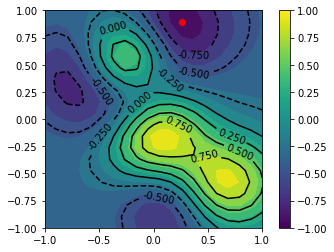

In [12]:
zi=func_2d[0]

im=plt.imshow(zi, vmin=zi.min(), vmax=zi.max(),origin='lower',extent=[-1,1,-1,1])

plt.colorbar(im)
plt.contourf(xi, yi,zi,16)
C = plt.contour(xi, yi,zi, 8, colors='black')
plt.clabel(C, inline=True, fontsize=10)

idx_z=np.where(zi==zi.min())
for i in range(len(idx_z[0])):
    plt.scatter(x[idx_z[1][i]],y[idx_z[0][i]], c='red')

plt.show()

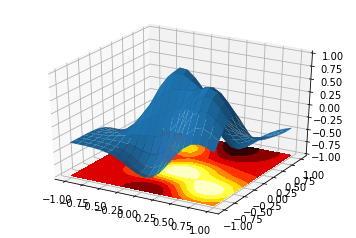

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xi, yi, zi)
ax.contourf(xi, yi,zi, zdir='z', offset=-1, cmap=plt.cm.hot) 
plt.show()

In [14]:
## multifidelity

In [15]:
x_r=np.random.randint(20, size=20)
y_r=np.random.randint(20, size=20)

x_mf=x[x_r]
y_mf=y[y_r]

z_mf=zi[y_r,x_r]

x, y = np.linspace(-1, 1, 10), np.linspace(-1, 1, 10)
xi, yi = np.meshgrid(x, y)

rbf = scipy.interpolate.Rbf(x_mf, y_mf, z_mf, function='gaussian',epsilon=0.45)
zi_mf = rbf(xi, yi)
zi_mf=normalize2d(zi_mf)

/home/weixiang/DML_MF_BO/env3/lib/python3.5/site-packages/scipy/interpolate/rbf.py:220: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.161215e-17
  self.nodes = linalg.solve(self.A, self.di)


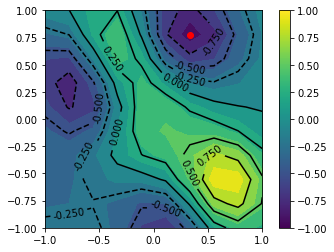

In [16]:
im=plt.imshow(zi_mf, vmin=zi_mf.min(), vmax=zi_mf.max(),origin='lower',extent=[-1,1,-1,1])

plt.colorbar(im)
plt.contourf(xi,yi,zi_mf,16)
C = plt.contour(xi, yi,zi_mf, 8, colors='black')
plt.clabel(C, inline=True, fontsize=10)

idx_z=np.where(zi_mf==zi_mf.min())
for i in range(len(idx_z[0])):
    plt.scatter(x[idx_z[1][i]],y[idx_z[0][i]], c='red')

plt.show()

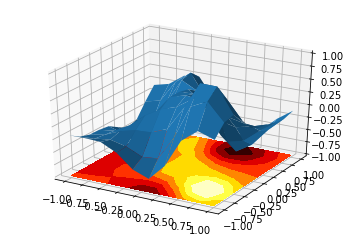

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xi, yi, zi_mf)
ax.contourf(xi, yi,zi_mf, zdir='z', offset=-1, cmap=plt.cm.hot) 
plt.show()

In [18]:
##save function
#torch.save(func_2d_mf, open('traindata_50000_2d_mf.pt', 'wb'))